# 01 - Problem (case study)

#### The objective of this data is to understand customer demographics and buying behavior. Use predictive analytics to detect the most profitable customers. Finally decide actions to increase profitable customer response, retention and growth.


# 02 - Getting Data

In [7]:
import pandas as pd  # keywords are highlighted in green, other strings in red, etc.
import numpy as np  
file1 = pd.read_csv('marketing_customer_analysis.csv') # pd.read means it is a panda function, reads it, and shows result in a data frame

#### Show DataFrame shape

In [65]:
display(file1.head(5)) # command to show the first 5 rows of the data frame
file1.shape

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


(10910, 26)

# 03 - Cleaning and Wrangling

#### Standardize header names

In [9]:
file1.columns


Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [10]:
file1 = file1.rename(columns={'EmploymentStatus':'Employment Status'})                         
file1.columns                            

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'Employment Status', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [11]:
cols = []
for i in range(len(file1.columns)):
     cols.append(file1.columns[i].lower())
file1.columns = cols

In [6]:
file1.columns

Index(['unnamed: 0', 'customer', 'state', 'customer lifetime value',
       'response', 'coverage', 'education', 'effective to date',
       'employment status', 'gender', 'income', 'location code',
       'marital status', 'monthly premium auto', 'months since last claim',
       'months since policy inception', 'number of open complaints',
       'number of policies', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'total claim amount', 'vehicle class', 'vehicle size',
       'vehicle type'],
      dtype='object')

#### Check numerial and categorial columns

In [12]:
file1.dtypes

unnamed: 0                         int64
customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employment status                 object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim          float64
months since policy inception      int64
number of open complaints        float64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size    

In [13]:
file1.select_dtypes(include=["object"])


,customer,state,response,coverage,education,effective to date,employment status,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [14]:
file1.select_dtypes(include=["int64",'float64'])

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [64]:
file1.head(5)

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


#### Dealing with Nan values

In [18]:
count_nan = file1.isna().sum().sum()
print(count_nan)

9254


In [19]:
file1.isna().sum() #check nan values

unnamed: 0                          0
customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employment status                   0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64

In [20]:
round(file1.isna().sum()/len(file1),4)*100 #percentage

unnamed: 0                        0.00
customer                          0.00
state                             5.78
customer lifetime value           0.00
response                          5.78
coverage                          0.00
education                         0.00
effective to date                 0.00
employment status                 0.00
gender                            0.00
income                            0.00
location code                     0.00
marital status                    0.00
monthly premium auto              0.00
months since last claim           5.80
months since policy inception     0.00
number of open complaints         5.80
number of policies                0.00
policy type                       0.00
policy                            0.00
renew offer type                  0.00
sales channel                     0.00
total claim amount                0.00
vehicle class                     5.70
vehicle size                      5.70
vehicle type             

In [21]:
file1['state'].value_counts()

California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
Name: state, dtype: int64

In [22]:
file1['state'] = file1['state'].fillna('California') #all NA to be transferred to the most common state, California

In [23]:
file1['response'].value_counts()

No     8813
Yes    1466
Name: response, dtype: int64

In [24]:
file1['response'] = file1['response'].fillna('No') #all NA to be transferred to the most answered, NO

In [25]:
round(file1.isna().sum()/len(file1),4)*100

unnamed: 0                        0.00
customer                          0.00
state                             0.00
customer lifetime value           0.00
response                          0.00
coverage                          0.00
education                         0.00
effective to date                 0.00
employment status                 0.00
gender                            0.00
income                            0.00
location code                     0.00
marital status                    0.00
monthly premium auto              0.00
months since last claim           5.80
months since policy inception     0.00
number of open complaints         5.80
number of policies                0.00
policy type                       0.00
policy                            0.00
renew offer type                  0.00
sales channel                     0.00
total claim amount                0.00
vehicle class                     5.70
vehicle size                      5.70
vehicle type             

In [26]:
file1['number of open complaints'].value_counts()
mean_num_complaints = file1['number of open complaints'].mean()
mean_num_complaints
file1['number of open complaints'] = file1['number of open complaints'].fillna(mean_num_complaints)


In [27]:
mean_num_complaints #replacing na with the mean

0.38425610586747105

In [28]:
round(file1.isna().sum()/len(file1),4)*100


unnamed: 0                        0.00
customer                          0.00
state                             0.00
customer lifetime value           0.00
response                          0.00
coverage                          0.00
education                         0.00
effective to date                 0.00
employment status                 0.00
gender                            0.00
income                            0.00
location code                     0.00
marital status                    0.00
monthly premium auto              0.00
months since last claim           5.80
months since policy inception     0.00
number of open complaints         0.00
number of policies                0.00
policy type                       0.00
policy                            0.00
renew offer type                  0.00
sales channel                     0.00
total claim amount                0.00
vehicle class                     5.70
vehicle size                      5.70
vehicle type             

In [29]:
file1['months since last claim'].value_counts()
mean_last_claim = file1['months since last claim'].mean()
mean_last_claim
file1['months since last claim'] = file1['months since last claim'].fillna(mean_last_claim)

In [31]:
mean_last_claim #replacing na with the mean

15.149070740488469

In [32]:
round(file1.isna().sum()/len(file1),4)*100

unnamed: 0                        0.00
customer                          0.00
state                             0.00
customer lifetime value           0.00
response                          0.00
coverage                          0.00
education                         0.00
effective to date                 0.00
employment status                 0.00
gender                            0.00
income                            0.00
location code                     0.00
marital status                    0.00
monthly premium auto              0.00
months since last claim           0.00
months since policy inception     0.00
number of open complaints         0.00
number of policies                0.00
policy type                       0.00
policy                            0.00
renew offer type                  0.00
sales channel                     0.00
total claim amount                0.00
vehicle class                     5.70
vehicle size                      5.70
vehicle type             

In [33]:
file1['vehicle class'].value_counts()

Four-Door Car    5212
Two-Door Car     2118
SUV              2012
Sports Car        550
Luxury SUV        208
Luxury Car        188
Name: vehicle class, dtype: int64

In [36]:
file1['vehicle class'] = file1['vehicle class'].fillna('Four-Door Car') #replacing na with the most common vehicle class, four-door car

In [37]:
round(file1.isna().sum()/len(file1),4)*100

unnamed: 0                        0.00
customer                          0.00
state                             0.00
customer lifetime value           0.00
response                          0.00
coverage                          0.00
education                         0.00
effective to date                 0.00
employment status                 0.00
gender                            0.00
income                            0.00
location code                     0.00
marital status                    0.00
monthly premium auto              0.00
months since last claim           0.00
months since policy inception     0.00
number of open complaints         0.00
number of policies                0.00
policy type                       0.00
policy                            0.00
renew offer type                  0.00
sales channel                     0.00
total claim amount                0.00
vehicle class                     0.00
vehicle size                      5.70
vehicle type             

In [39]:
file1['vehicle size'].value_counts()

Medsize    7251
Small      1966
Large      1071
Name: vehicle size, dtype: int64

In [40]:
file1['vehicle size'] = file1['vehicle size'].fillna('Medsize') #replacing na with the most common vehicle size, medium size

In [41]:
round(file1.isna().sum()/len(file1),4)*100

unnamed: 0                        0.00
customer                          0.00
state                             0.00
customer lifetime value           0.00
response                          0.00
coverage                          0.00
education                         0.00
effective to date                 0.00
employment status                 0.00
gender                            0.00
income                            0.00
location code                     0.00
marital status                    0.00
monthly premium auto              0.00
months since last claim           0.00
months since policy inception     0.00
number of open complaints         0.00
number of policies                0.00
policy type                       0.00
policy                            0.00
renew offer type                  0.00
sales channel                     0.00
total claim amount                0.00
vehicle class                     0.00
vehicle size                      0.00
vehicle type             

In [42]:
file1['vehicle type'].value_counts()

A    5428
Name: vehicle type, dtype: int64

In [43]:
#considering all the outputs are the same "A", I drop the column
file1 = file1.drop(['vehicle type'], axis=1)


In [44]:
round(file1.isna().sum()/len(file1),4)*100

unnamed: 0                       0.0
customer                         0.0
state                            0.0
customer lifetime value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective to date                0.0
employment status                0.0
gender                           0.0
income                           0.0
location code                    0.0
marital status                   0.0
monthly premium auto             0.0
months since last claim          0.0
months since policy inception    0.0
number of open complaints        0.0
number of policies               0.0
policy type                      0.0
policy                           0.0
renew offer type                 0.0
sales channel                    0.0
total claim amount               0.0
vehicle class                    0.0
vehicle size                     0.0
dtype: float64

#### Dealing with Datetime format columns

In [48]:
file1['MONTHS'] = pd.to_datetime(file1['effective to date'], errors='coerce')
file1

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,MONTHS
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2011-02-18
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,2011-01-18
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2011-02-10
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,2011-01-11
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,0.384256,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,2011-01-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,0.384256,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,2011-01-19
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.000000,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,2011-01-06
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.000000,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2011-02-06
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.000000,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,2011-02-13


# 04 - EDA (Exploratory Data Analysis) 

In [49]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

#### Show and describe DataFrame

In [46]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed: 0                     10910 non-null  int64  
 1   customer                       10910 non-null  object 
 2   state                          10910 non-null  object 
 3   customer lifetime value        10910 non-null  float64
 4   response                       10910 non-null  object 
 5   coverage                       10910 non-null  object 
 6   education                      10910 non-null  object 
 7   effective to date              10910 non-null  object 
 8   employment status              10910 non-null  object 
 9   gender                         10910 non-null  object 
 10  income                         10910 non-null  int64  
 11  location code                  10910 non-null  object 
 12  marital status                 10910 non-null 

In [47]:
file1.describe()

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330
std,3149.590053,6885.081434,30359.195670,34.442532,9.783520,27.940675,0.885589,2.399359,292.180556
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2727.250000,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527
50%,5454.500000,5771.147235,33813.500000,83.000000,15.000000,48.000000,0.000000,2.000000,382.564630
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.384256,4.000000,547.200000
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


#### Plot of the total number of responses

In [50]:
file1['response'].value_counts()

No     9444
Yes    1466
Name: response, dtype: int64

In [51]:
file1['response'] = file1['response'].map(dict(Yes=1, No=0))

         

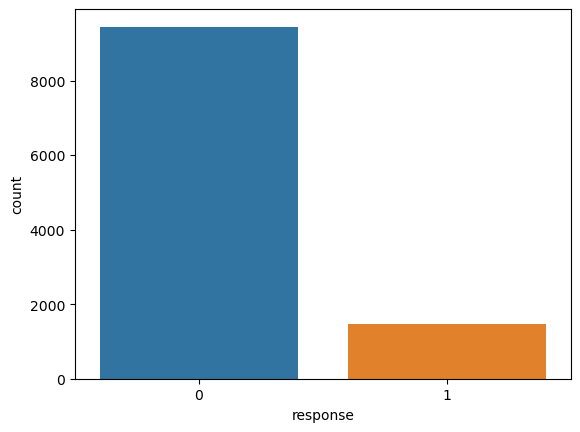

In [52]:
sns.countplot(x=file1["response"])
plt.show()

#### Plot of the response rate by the sales channel

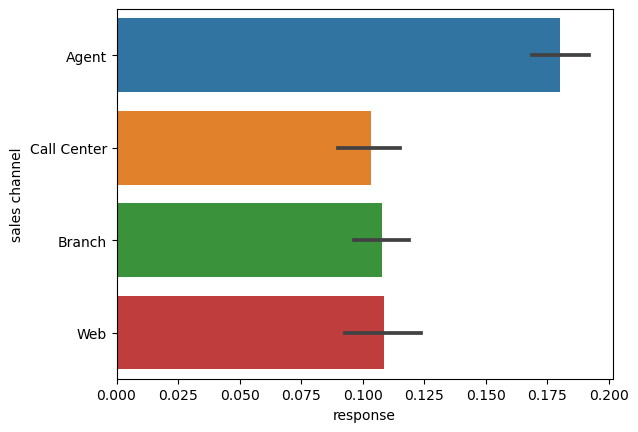

In [55]:
sns.barplot(x="response", y="sales channel", data=file1)
plt.show()

#### Plot of the response rate by income

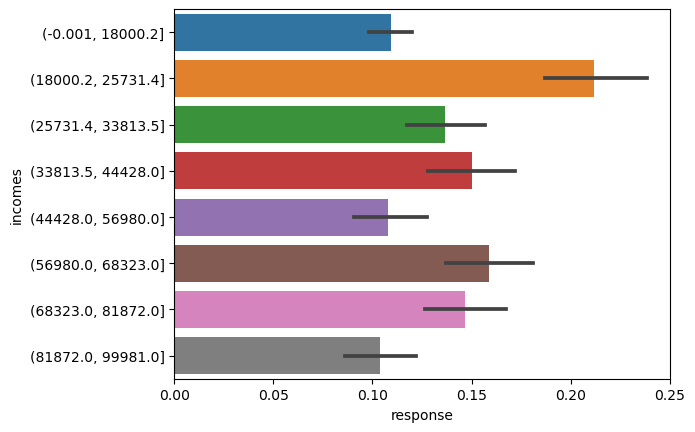

In [56]:
file1['incomes'] = pd.qcut(file1['income'], q=10, duplicates='drop')
sns.barplot(x = file1["response"], y = file1['incomes'])
plt.show()


#### Plot of the response rate by the total claim amount

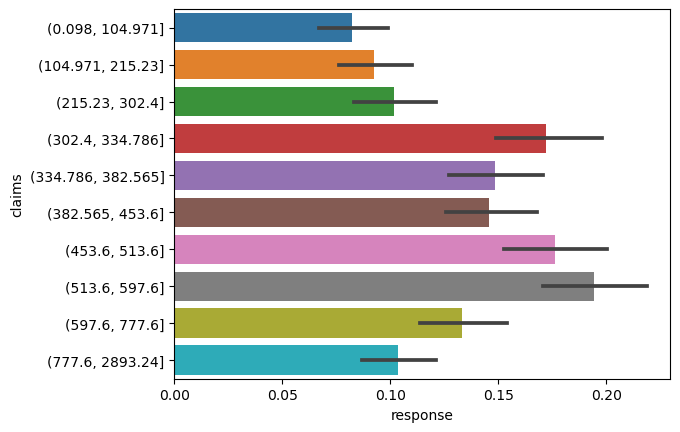

In [58]:
#claims= total claim amounts cut into 10 different bins
file1['claims'] = pd.qcut(file1['total claim amount'], q=10)
sns.barplot(x = file1["response"], y = file1['claims'])
plt.show()

In [59]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   unnamed: 0                     10910 non-null  int64         
 1   customer                       10910 non-null  object        
 2   state                          10910 non-null  object        
 3   customer lifetime value        10910 non-null  float64       
 4   response                       10910 non-null  int64         
 5   coverage                       10910 non-null  object        
 6   education                      10910 non-null  object        
 7   effective to date              10910 non-null  object        
 8   employment status              10910 non-null  object        
 9   gender                         10910 non-null  object        
 10  income                         10910 non-null  int64         
 11  location code  

# LAB 4

In [62]:
import pandas as pd
import numpy as np
%matplotlib inline
file1 = pd.read_csv('marketing_customer_analysis.csv')
display(file1.head(2))
display(file1.tail(2))
file1.shape

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN


,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A
10909,10909,IV32877,NaN,6857.519928,NaN,Basic,Bachelor,1/8/11,Unemployed,M,...,0.0,3,Personal Auto,Personal L1,Offer4,Web,1021.719397,SUV,Medsize,NaN


(10910, 26)

In [ ]:
file1.dtypes

In [ ]:
def clean_data(file1):
    
    file1.columns=[e.lower().replace(' ', '_') for e in file1.columns]
    
    file1=file1.drop(columns=['unnamed:_0'])
    
    file1['vehicle_type']=file1['vehicle_type'].fillna('M')
    
    file1['effective_to_date']=pd.to_datetime(file1['effective_to_date'], errors='coerce')
    file1['month'] = file1['effective_to_date'].dt.month
    
    file1=file1.dropna()
    return file1

In [ ]:
file2 = clean_data(file1)

In [ ]:
numerical = file2.select_dtypes(include=np.number)
numerical

In [ ]:
categoricals = file2.select_dtypes(include=np.object)
categoricals

In [ ]:
for column in numerical:
    sns.displot(numerical[column])

In [ ]:
#adjusting the figures so we can visualize better the image
numerical.hist(bins=30, figsize=(15, 10))

In [ ]:
correlations_matrix = file2.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [ ]:
#adjusting the figures so we can visualize better the image
plt.figure(figsize = (16,5))
sns.heatmap(correlations_matrix, annot=True)
plt.show()

# LAB 5

In [ ]:
y = file2['total_claim_amount']
X = file2.drop(['total_claim_amount'],axis=1)

In [ ]:
X

In [ ]:
# Normalize between 0 and 1
from sklearn.preprocessing import MinMaxScaler # do not use the function Normalise() - it does something entirely different
from sklearn.preprocessing import StandardScaler
y = file2['total_claim_amount']
X = file2.drop(['total_claim_amount'], axis=1)
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = np.object)
transformer = MinMaxScaler().fit(numerical)
x_normalized = transformer.transform(numerical)
print(x_normalized.shape)
x_normalized
#create a dataframe and put the output
pd.DataFrame(x_normalized, columns=numerical.columns)

In [ ]:
pd.DataFrame(x_normalized, columns=numerical.columns).corr()

# LAB 6

### Processing data

In [148]:
# assumption 1. column customer has unique values, so it does not add info
#drop maybe effective to date and response

X_cat = file2.select_dtypes(include = object)

X_cat = X_cat.drop(['customer'], axis=1)
X_cat.head(3)

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,M
1,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,M
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A


#### One Hot/Label encoding

In [149]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from seaborn import load_dataset
import pandas as pd


In [150]:
encoder = OneHotEncoder().fit(X_cat)
encoded_for_p = encoder.transform(X_cat).toarray()
encoded_for_p
display(encoder.categories_)
cols = [colname for row in encoder.categories_ for colname in row]
display(cols)
onehot_encoded_for_p = pd.DataFrame(encoded_for_p, columns=cols)
onehot_encoded_for_p
cols_to_drop = [row[0] for row in encoder.categories_]
cols_to_drop
onehot_encoded_for_p = onehot_encoded_for_p.drop(cols_to_drop,axis=1)
onehot_encoded_for_p.head()

[array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
       dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Basic', 'Extended', 'Premium'], dtype=object),
 array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
       dtype=object),
 array(['Disabled', 'Employed', 'Medical Leave', 'Retired', 'Unemployed'],
       dtype=object),
 array(['F', 'M'], dtype=object),
 array(['Rural', 'Suburban', 'Urban'], dtype=object),
 array(['Divorced', 'Married', 'Single'], dtype=object),
 array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object),
 array(['Corporate L1', 'Corporate L2', 'Corporate L3', 'Personal L1',
        'Personal L2', 'Personal L3', 'Special L1', 'Special L2',
        'Special L3'], dtype=object),
 array(['Offer1', 'Offer2', 'Offer3', 'Offer4'], dtype=object),
 array(['Agent', 'Branch', 'Call Center', 'Web'], dtype=object),
 array(['Four-Door Car', 'Luxury Car', 'Luxury SUV', 'SUV', 'Sports Car',
        'Two-Door Car'],

['Arizona',
 'California',
 'Nevada',
 'Oregon',
 'Washington',
 'No',
 'Yes',
 'Basic',
 'Extended',
 'Premium',
 'Bachelor',
 'College',
 'Doctor',
 'High School or Below',
 'Master',
 'Disabled',
 'Employed',
 'Medical Leave',
 'Retired',
 'Unemployed',
 'F',
 'M',
 'Rural',
 'Suburban',
 'Urban',
 'Divorced',
 'Married',
 'Single',
 'Corporate Auto',
 'Personal Auto',
 'Special Auto',
 'Corporate L1',
 'Corporate L2',
 'Corporate L3',
 'Personal L1',
 'Personal L2',
 'Personal L3',
 'Special L1',
 'Special L2',
 'Special L3',
 'Offer1',
 'Offer2',
 'Offer3',
 'Offer4',
 'Agent',
 'Branch',
 'Call Center',
 'Web',
 'Four-Door Car',
 'Luxury Car',
 'Luxury SUV',
 'SUV',
 'Sports Car',
 'Two-Door Car',
 'Large',
 'Medsize',
 'Small',
 'A',
 'M']

,California,Nevada,Oregon,Washington,Yes,Extended,Premium,College,Doctor,High School or Below,...,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Medsize,Small,M
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [151]:
X_num = X_num.reset_index(drop=True)

In [152]:
X_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month
0,4809.216960,48029,61,7.0,52,0.0,9,2
1,2228.525238,0,64,3.0,26,0.0,1,1
2,14947.917300,22139,100,34.0,31,0.0,2,2
3,22332.439460,49078,97,10.0,3,0.0,2,1
4,5035.035257,37405,63,8.0,99,3.0,4,2
...,...,...,...,...,...,...,...,...
9129,2771.663013,59855,74,30.0,82,4.0,1,1
9130,19228.463620,0,187,14.0,32,0.0,2,2
9131,5259.444853,61146,65,7.0,68,0.0,6,1
9132,23893.304100,39837,201,11.0,63,0.0,2,2


#### Concatenate data frames

In [153]:
concat = pd.concat ([X_num,onehot_encoded_for_p], axis=1)

In [154]:
concat

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,California,Nevada,...,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Medsize,Small,M
0,4809.216960,48029,61,7.0,52,0.0,9,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,2228.525238,0,64,3.0,26,0.0,1,1,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,14947.917300,22139,100,34.0,31,0.0,2,2,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,22332.439460,49078,97,10.0,3,0.0,2,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5035.035257,37405,63,8.0,99,3.0,4,2,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,2771.663013,59855,74,30.0,82,4.0,1,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9130,19228.463620,0,187,14.0,32,0.0,2,2,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9131,5259.444853,61146,65,7.0,68,0.0,6,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9132,23893.304100,39837,201,11.0,63,0.0,2,2,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


### Linear Regression
#### Train-test split

In [155]:
X = pd.concat ([X_num,onehot_encoded_for_p], axis=1)
y = file2['total_claim_amount']
y.head()

0    292.800000
1    744.924331
2    480.000000
3    484.013411
6    287.556107
Name: total_claim_amount, dtype: float64

In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [179]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7307, 52)
(1827, 52)
(7307,)
(1827,)


##### Apply linear regression

In [180]:
X_train.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,California,Nevada,...,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Medsize,Small,M
5123,2659.705650,0,87,4.0,4,3.0,1,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7738,8036.450340,0,112,7.0,42,0.0,9,2,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
214,5548.031892,67798,69,1.0,78,0.0,9,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8580,13197.928930,0,68,19.0,2,3.0,2,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7857,7704.248723,49088,97,4.0,46,0.0,3,2,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [181]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, r2_score


lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [182]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.7718411353902103

In [183]:
# But now we evaluate it in the TEST portion of the data, that we did not use for training.
# This way we know our model is genuinely guessing our donations, not just repeating the values it has seen in the training data


predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.7731951409664526

In [177]:
y_test[:5]

855     456.523850
52      406.902001
4816    128.516525
1844    110.868874
4457    106.737787
Name: total_claim_amount, dtype: float64

In [163]:
predictions_test[:5]

array([543.86372657, 349.06428896, -27.4776314 , -35.1579271 ,
        -1.67952143])

In [164]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
mse

19080.53927278485

In [165]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

138.13232522760504

In [166]:
y_test.mean()

428.89844935060273

In [167]:
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, predictions_test)
print(mae)


95.41165709442572


In [168]:
rmse = math.sqrt(mse)
print(rmse)

NameError: name 'math' is not defined

# LAB 7

### Improve accuracy of the model

#### Use the concept of multicollinearity and remove insignificant variables

In [169]:
correlation_matrix = concat.corr()
display(correlations_matrix)


,unnamed:_0,customer_lifetime_value,response,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
unnamed:_0,1.000000,0.001355,-0.013449,0.008910,0.000863,0.007958,0.012795,0.007325,0.002319,-0.000593
customer_lifetime_value,0.001355,1.000000,-0.008649,0.028306,0.403069,0.016052,0.016960,-0.032243,0.016024,0.232626
response,-0.013449,-0.008649,1.000000,0.011484,0.013826,-0.015467,-0.005666,-0.005304,-0.017936,0.015802
income,0.008910,0.028306,0.011484,1.000000,-0.009788,-0.023814,-0.005903,0.007163,-0.009960,-0.354141
monthly_premium_auto,0.000863,0.403069,0.013826,-0.009788,1.000000,0.008744,0.018953,-0.010350,-0.020505,0.631799
months_since_last_claim,0.007958,0.016052,-0.015467,-0.023814,0.008744,1.000000,-0.039318,0.002246,0.007678,0.013137
months_since_policy_inception,0.012795,0.016960,-0.005666,-0.005903,0.018953,-0.039318,1.000000,0.004376,-0.009123,0.003095
number_of_open_complaints,0.007325,-0.032243,-0.005304,0.007163,-0.010350,0.002246,0.004376,1.000000,0.004098,-0.011379
number_of_policies,0.002319,0.016024,-0.017936,-0.009960,-0.020505,0.007678,-0.009123,0.004098,1.000000,-0.008923
total_claim_amount,-0.000593,0.232626,0.015802,-0.354141,0.631799,0.013137,0.003095,-0.011379,-0.008923,1.000000


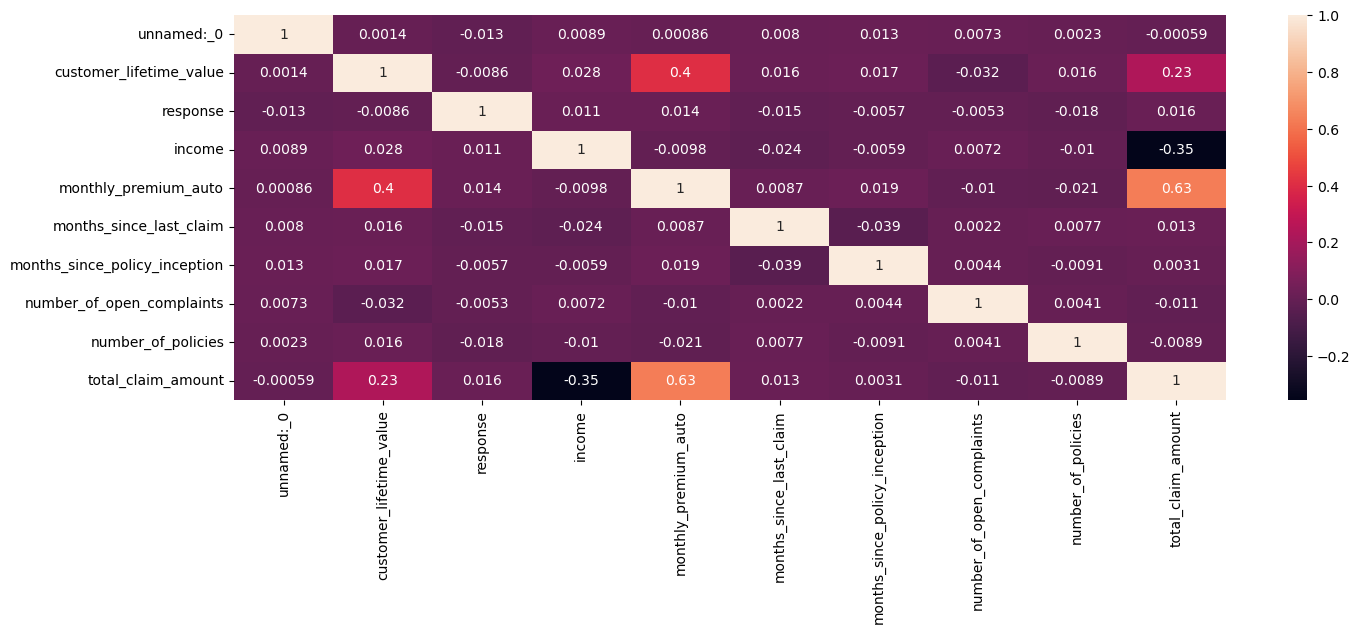

In [170]:
plt.figure(figsize = (16,5))
sns.heatmap(correlations_matrix, annot=True)
plt.show()

#### Use a different method of scaling the numerical variables

#### Use a different ratio of train test split

#### Use the transformation on numerical columns which align it more towards a normal distribution